## Linear Regression

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('data/Salary_Data.csv')

In [4]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
df.sample(3)

,YearsExperience,Salary
3,2.0,43525.0
1,1.3,46205.0
28,10.3,122391.0


In [6]:
df.shape

(30, 2)

In [7]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [9]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [10]:
X= df.drop(columns=['Salary'])
y= df['Salary']

In [11]:
X

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [12]:
y

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [28]:
X_test

,YearsExperience
2,1.5
28,10.3
13,4.1
10,3.9
26,9.5
24,8.7


In [29]:
y_train

27    112635.0
11     55794.0
17     83088.0
22    101302.0
5      56642.0
16     66029.0
8      64445.0
14     61111.0
23    113812.0
20     91738.0
1      46205.0
29    121872.0
6      60150.0
4      39891.0
18     81363.0
19     93940.0
9      57189.0
7      54445.0
25    105582.0
3      43525.0
0      39343.0
21     98273.0
15     67938.0
12     56957.0
Name: Salary, dtype: float64

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
model = LinearRegression()

In [32]:
model

LinearRegression()

In [34]:
# Training Data 
model.fit(X_train,y_train)

LinearRegression()

In [60]:
# test
y_pred = model.predict(X_test)
y_pred

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

In [40]:
pd.DataFrame({'y_test':y_test,'y_pred':y_pred,'MAE':y_test-y_pred})

,y_test,y_pred,MAE
2,37731.0,40748.961841,-3017.961841
28,122391.0,122699.622956,-308.622956
13,57081.0,64961.657170,-7880.657170
10,63218.0,63099.142145,118.857855
26,116969.0,115249.562855,1719.437145
24,109431.0,107799.502753,1631.497247


In [61]:
# Import metrics.
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
print("Mean Absolute Error",mean_absolute_error(y_test,y_pred))
print("Mean Square Error",mean_squared_error(y_test,y_pred))
print("Root Mean Square Error",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2-Score",r2_score(y_test,y_pred))

Mean Absolute Error 2446.1723690465055
Mean Square Error 12823412.298126549
Root Mean Square Error 3580.979237321343
R2-Score 0.988169515729126


In [45]:
# coeficient  =  value of m 
model.coef_

array([9312.57512673])

In [47]:
# Intercept value which is c
model.intercept_

26780.09915062818

In [54]:
# y = 9312.57512673 (X) + 26780.09915062818
y = (9312.57512673)* (10.3)  + (26780.09915062818)

In [55]:
y

122699.62295594718

In [63]:
# unseen data test
model.predict([[20]])

C:\Users\Sajid\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([213031.60168521])

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

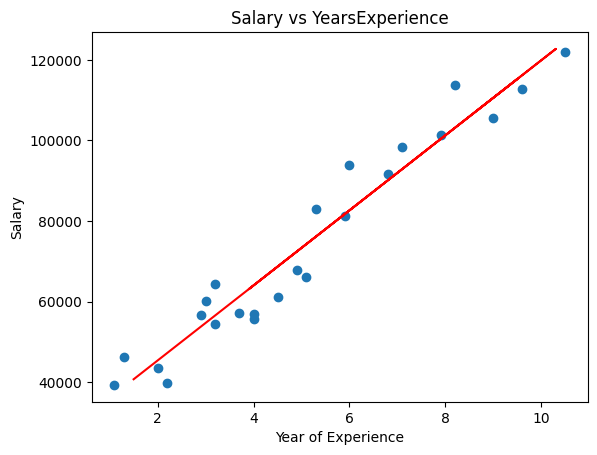

In [65]:
plt.scatter(X_train,y_train)
plt.plot(X_test,y_pred,color='r')
plt.title("Salary vs YearsExperience")
plt.xlabel("Year of Experience")
plt.ylabel("Salary")
plt.show()

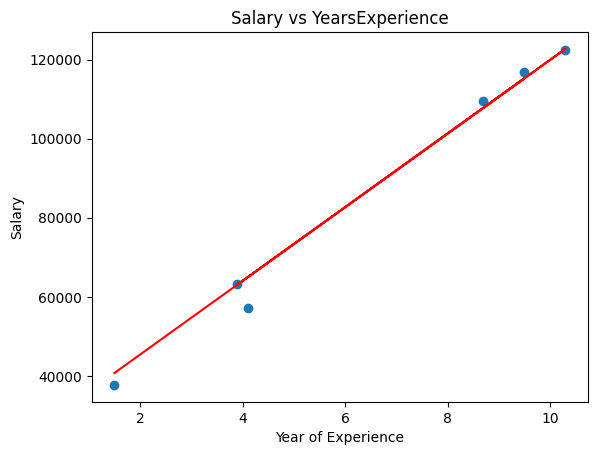

In [66]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred,color='r')
plt.title("Salary vs YearsExperience")
plt.xlabel("Year of Experience")
plt.ylabel("Salary")
plt.show()